In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('diabetes.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
print("=" * 50)
print("DATASET EXPLORATION")
print("=" * 50)

# Basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset info:")
print(df.info())

print("\nDescriptive statistics:")
display(df.describe())

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Check class distribution
print(f"\nClass distribution (Outcome):")
print(df['Outcome'].value_counts())
print(f"Percentage of diabetes cases: {df['Outcome'].mean():.2%}")

DATASET EXPLORATION
Dataset shape: (768, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Class distribution (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64
Percentage of diabetes cases: 34.90%


In [ ]:
print("=" * 50)
print("DATA PREPROCESSING")
print("=" * 50)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Handle potential zeros in features that shouldn't be zero
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_check:
    zero_count = (X[col] == 0).sum()
    if zero_count > 0:
        print(f"Found {zero_count} zeros in {col}")
        # Replace zeros with median
        median_val = X[X[col] != 0][col].median()
        X[col] = X[col].replace(0, median_val)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

DATA PREPROCESSING
Found 5 zeros in Glucose
Found 35 zeros in BloodPressure
Found 227 zeros in SkinThickness
Found 374 zeros in Insulin
Found 11 zeros in BMI
Training set size: 537
Test set size: 231


In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42)
}

results = {}

print("=" * 50)
print("MODEL TRAINING AND EVALUATION")
print("=" * 50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred
    }
    
    print(f"{name} Results:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"  Cross-validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

MODEL TRAINING AND EVALUATION

Training Logistic Regression...
Logistic Regression Results:
  Accuracy:  0.7446
  Precision: 0.6719
  Recall:    0.5309
  F1-Score:  0.5931
  Cross-validation Accuracy: 0.7746 (+/- 0.0661)

Training SVM (Linear)...
SVM (Linear) Results:
  Accuracy:  0.7273
  Precision: 0.6552
  Recall:    0.4691
  F1-Score:  0.5468
  Cross-validation Accuracy: 0.7820 (+/- 0.0774)

Training SVM (RBF)...
SVM (RBF) Results:
  Accuracy:  0.7403
  Precision: 0.6721
  Recall:    0.5062
  F1-Score:  0.5775
  Cross-validation Accuracy: 0.7560 (+/- 0.0369)


In [ ]:
print("=" * 50)
print("MODEL COMPARISON")
print("=" * 50)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1-Score': [results[model]['f1_score'] for model in results]
}).set_index('Model')

print("Performance Comparison:")
display(comparison_df.round(4))

# Find best model based on F1-score
best_model_name = max(results.keys(), key=lambda x: results[x]['f1_score'])
best_model = results[best_model_name]

print(f"\nBest Model: {best_model_name} (F1-Score: {best_model['f1_score']:.4f})")

MODEL COMPARISON
Performance Comparison:


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.7446,0.6719,0.5309,0.5931
SVM (Linear),0.7273,0.6552,0.4691,0.5468
SVM (RBF),0.7403,0.6721,0.5062,0.5775



Best Model: Logistic Regression (F1-Score: 0.5931)


VISUALIZATIONS


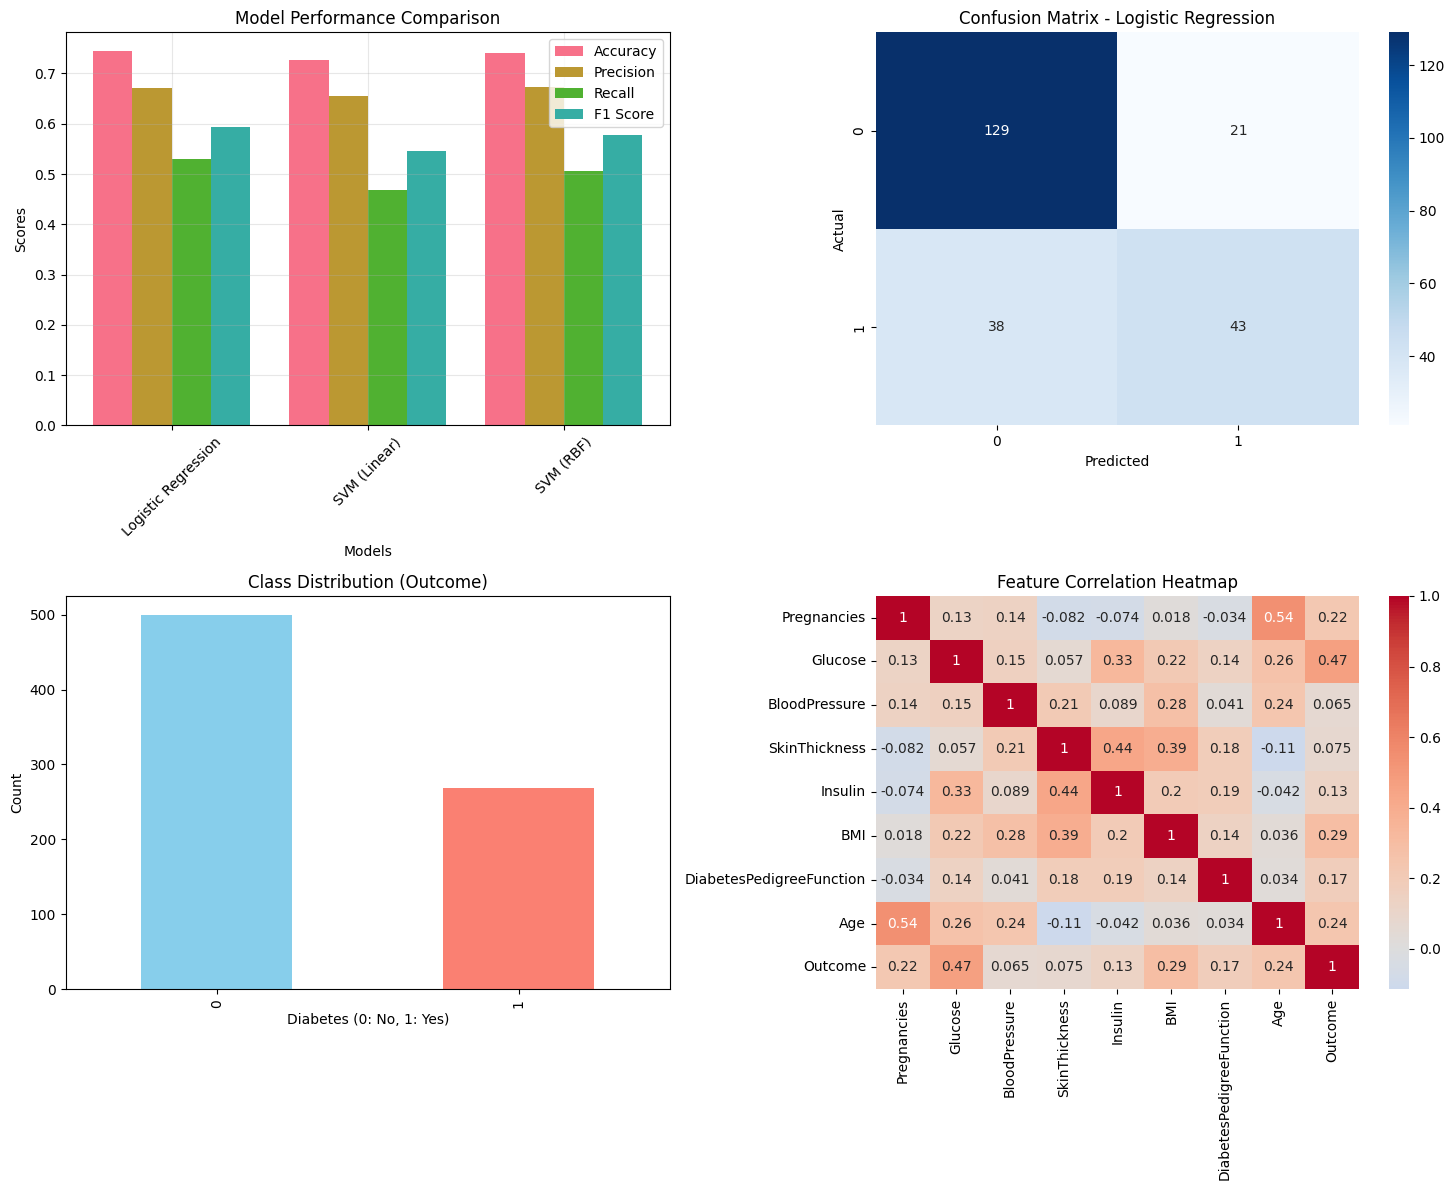

In [ ]:
print("=" * 50)
print("VISUALIZATIONS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model comparison bar chart
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
model_names = list(results.keys())

x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in model_names]
    axes[0, 0].bar(x + i*width, values, width, label=metric.replace('_', ' ').title())

axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Scores')
axes[0, 0].set_title('Model Performance Comparison')
axes[0, 0].set_xticks(x + width*1.5)
axes[0, 0].set_xticklabels(model_names, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Confusion matrix for best model
y_pred_best = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title(f'Confusion Matrix - {best_model_name}')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. Class distribution
df['Outcome'].value_counts().plot(kind='bar', ax=axes[1, 0], color=['skyblue', 'salmon'])
axes[1, 0].set_title('Class Distribution (Outcome)')
axes[1, 0].set_xlabel('Diabetes (0: No, 1: Yes)')
axes[1, 0].set_ylabel('Count')

# 4. Feature correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 50)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 50)

for name in results:
    print(f"\n{name} - Detailed Classification Report:")
    print(classification_report(y_test, results[name]['predictions']))

DETAILED CLASSIFICATION REPORTS

Logistic Regression - Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231


SVM (Linear) - Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       150
           1       0.66      0.47      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.71       231


SVM (RBF) - Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.51      0.58        81

  

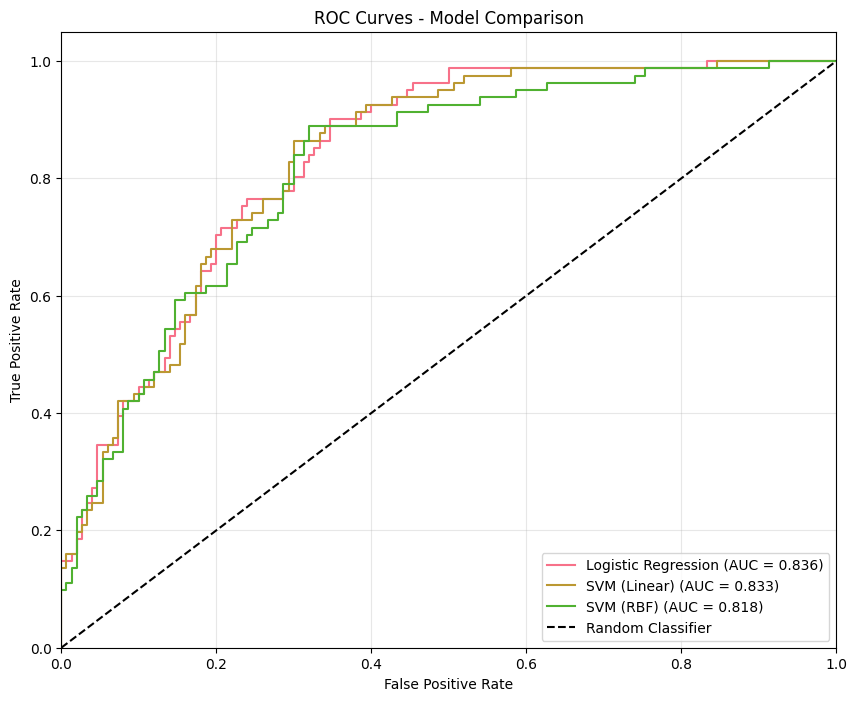

In [ ]:
# ROC Curves for all models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name in results:
    if hasattr(results[name]['model'], 'predict_proba'):
        y_proba = results[name]['model'].predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = results[name]['model'].decision_function(X_test_scaled)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("=" * 50)
print("FINAL SUMMARY")
print("=" * 50)
print(f"Best performing model: {best_model_name}")
print(f"Best F1-Score: {results[best_model_name]['f1_score']:.4f}")
print(f"Best Accuracy: {results[best_model_name]['accuracy']:.4f}")

FINAL SUMMARY
Best performing model: Logistic Regression
Best F1-Score: 0.5931
Best Accuracy: 0.7446
